# BREAST CANCER CLASSIFICATION #

## Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the Dataset

In [27]:
df = pd.read_csv('wdbc.csv')


## Exploratory Data Analysis

In [28]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
# Check the number of rows and columns
df.shape

(569, 33)

In [30]:
# Check how many unique values are there in non-categorical columns and show them
print(df['diagnosis'].unique())


['M' 'B']


In [31]:
# Check what rows have missing/null values and count them.
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [32]:
# Drop the columns that have missing values
df.drop(['Unnamed: 32'], axis=1, inplace=True)


In [33]:
# Count the number of classifications of each type
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

/Applications/work/anaconda3/envs/breastcancerprediction/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

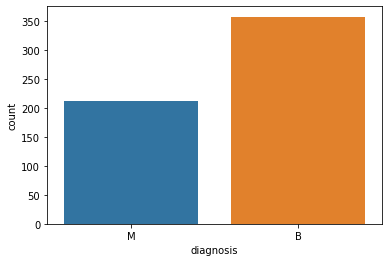

In [34]:
# Visualize the above method by using seaborn
sns.countplot(df['diagnosis'], label='count')


In [35]:
# Look at the data types of each column to see which need to be encoded
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [36]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
df.iloc[:,1] = label_encoder_y.fit_transform(df.iloc[:,1].values)


In [37]:
# Analyze correlation between features
df.corr()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


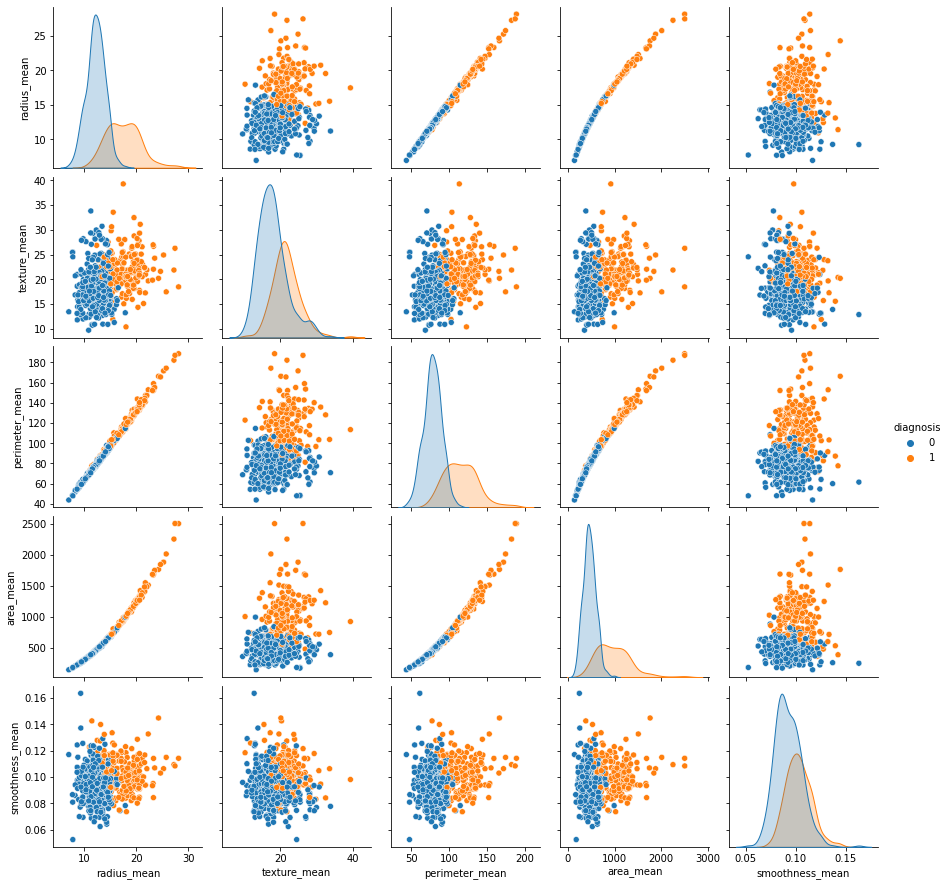

In [38]:
# Visualize colinearity using seaborn
# Diagnosis, Radius Mean, Texture Mean, Perimeter Mean, Area Mean
sns.pairplot(df.iloc[:,1:7], hue='diagnosis')


<AxesSubplot:>

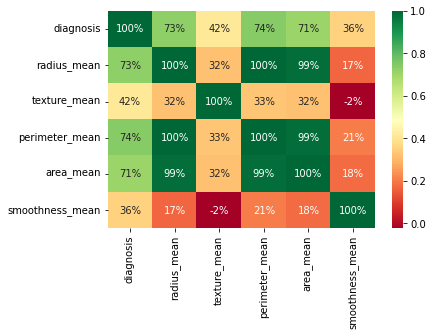

In [39]:
# Plot a heatmap of features
# We will only use the first 5-6 features

sns.heatmap(df.iloc[:,1:7].corr(), annot=True, cmap='RdYlGn', fmt='.0%')


## Splitting data into independent and dependent variables

In [40]:
X = df.iloc[:,2:]
y = df.iloc[:,1]


## Split data into training and test sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)


## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Feature Importance


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

model.feature_importances_


array([0.03801323, 0.02410011, 0.0602517 , 0.05045439, 0.00998469,
       0.0211379 , 0.03859195, 0.09341178, 0.00775369, 0.00642089,
       0.02615297, 0.0050629 , 0.02407882, 0.03060246, 0.00642775,
       0.00960637, 0.00829172, 0.01064238, 0.00632748, 0.00544271,
       0.09810726, 0.03331898, 0.07326773, 0.08696617, 0.01927924,
       0.01768931, 0.05192052, 0.10730126, 0.01932668, 0.01006697])

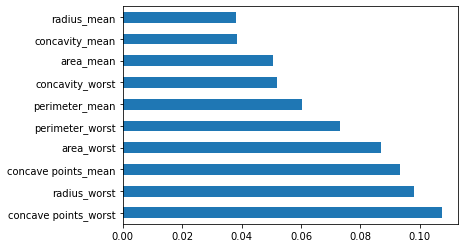

In [44]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()


## Building Models

In [45]:
# RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

    

# Hyperparameter Tuning

In [12]:
# BULIDING HYPERPARAMETERS
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
min_samples_split = [1, 2, 3, 5, 8, 11]
min_samples_leaf = [1, 2, 4, 6, 8]
criterion = ['entropy', 'gini']


In [13]:
# RANDOMIZED SEARCH CV
from sklearn.model_selection import RandomizedSearchCV
rf_randomsearch = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}
rf_randomcv = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_randomsearch, n_iter=100, cv=3, verbose=2, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Applications/work/anaconda3/envs/breastcancerprediction/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.95070423 0.94366197 0.94835681 0.94366197 0.94131455 0.94835681
 0.94835681 0.95539906 0.94835681 0.95070423 0.94835681 0.94600939
 0.94600939 0.95070423 0.94366197 0.95305164        nan 0.94600939
 0.95070423 0.94366197 0.95774648 0.94366197 0.93896714        nan
 0.95774648 0.94835681 0.93661972        nan 0.95539906 0.95305164
 0.95070423        nan 0.95070423 0.94600939 0.93896714 0.94600939
 0.94366197 0.95070423 0.95305164 0.95070423        nan 0.95070423
 0.94835681 0.94835681 0.94835681 0.94131455 0.94835681 0.95070423
 0.93661972        nan 0.95070423 0.94600939 0.94835681 0.94835681
 0.94366197        nan 0.94366197 0.94131455 0.94835681 0.94366197
 0.94600939 0.95070423 0.95539906 0.94600939 0.94600939 0.95070423
 0.94835681 0.94366197 0.94600939 0.94366197 0.94835681 0.94835681
 0.94366197

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 5, 8,
                                                              11],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   ve

In [14]:
rf_randomcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=1000, max_features='log2',
                       min_samples_leaf=2, n_estimators=600)

In [15]:
best_rf = rf_randomcv.best_estimator_
y_pred_rf_random = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf_random))
print('Accuracy Score :: ', accuracy_score(y_test, y_pred_rf_random))
print(classification_report(y_test, y_pred_rf_random))


[[87  3]
 [ 1 52]]
Accuracy Score ::  0.972027972027972
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# GRID SEARCH CV
from sklearn.model_selection import GridSearchCV
rf_gridsearch = {
    'n_estimators': [int(x) for x in np.linspace(start=rf_randomcv.best_params_['n_estimators']-200, stop=rf_randomcv.best_params_['n_estimators']+200, num=10)],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'max_depth': [int(x) for x in np.linspace(start=rf_randomcv.best_params_['max_depth']-100, stop=rf_randomcv.best_params_['max_depth']+100, num=10)],
    'min_samples_split': [
      rf_randomcv.best_params_['min_samples_split']-2,
      rf_randomcv.best_params_['min_samples_split']-1,
      rf_randomcv.best_params_['min_samples_split'],
      rf_randomcv.best_params_['min_samples_split']+1,
      rf_randomcv.best_params_['min_samples_split']+2
    ],
    'min_samples_leaf': [
        rf_randomcv.best_params_['min_samples_leaf'],
        rf_randomcv.best_params_['min_samples_leaf']+2,
        rf_randomcv.best_params_['min_samples_leaf']+4
        ],
    'criterion': [rf_randomcv.best_params_['criterion']]
}

rf_gridcv = GridSearchCV(estimator=rf_model, param_grid=rf_gridsearch, cv=3, verbose=True, n_jobs=-1)
rf_gridcv.fit(X_train, y_train)


In [ ]:
rf_gridcv.best_estimator_

In [ ]:
best_rf_grid = rf_gridcv.best_estimator_
y_pred_rf_grid = best_rf_grid.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf_grid))
print('Accuracy Score :: ', accuracy_score(y_test, y_pred_rf_grid))
print(classification_report(y_test, y_pred_rf_grid))


In [17]:
## Automated Hyperparameter Tuning - Bayesian Optimization
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials 
rf_space = {
    'n_estimators': hp.choice(label='n_estimators', options=[10,50,300,750,1000,1200]),
    'max_features': hp.choice(label='max_features', options=['auto', 'sqrt', 'log2', None]),
    'max_depth': hp.quniform(label='max_depth', low=10, high=1200, q=10),
    'min_samples_split': hp.uniform(label='min_samples_split', low=0, high=1),
    'min_samples_leaf': hp.uniform(label='min_samples_leaf', low=0, high=0.5),
    'criterion': hp.choice(label='criterion', options=['entropy', 'gini'])
}


In [18]:
from sklearn.model_selection import cross_val_score
def rf_objective(rf_space):
    model = RandomForestClassifier(
        n_estimators=rf_space['n_estimators'],
        max_features=rf_space['max_features'],
        max_depth=rf_space['max_depth'],
        min_samples_split=rf_space['min_samples_split'],
        min_samples_leaf=rf_space['min_samples_leaf'],
        criterion=rf_space['criterion']
        )
    
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    return {
        'loss': -accuracy,
        'status': STATUS_OK
    }

In [19]:
trials = Trials()
best_rf_bayesian = fmin(
    fn=rf_objective,
    space= rf_space,
    algo= tpe.suggest,
    max_evals = 80,
    trials = trials
    )



100%|██████████| 80/80 [03:07<00:00,  2.34s/trial, best loss: -0.9530779753761971]


In [21]:
best_rf_bayesian

{'criterion': 0,
 'max_depth': 10.0,
 'max_features': 1,
 'min_samples_leaf': 0.0024056101322484135,
 'min_samples_split': 0.01694883118367719,
 'n_estimators': 2}

In [24]:
# Adding best parameters from bayesian optimization into a dictionary
crit = {
    0: 'entropy',
    1: 'gini'
}
feat = {
    0: 'auto',
    1: 'sqrt',
    2: 'log2',
    3: None
}
est = {
    0: 10,
    1: 50,
    2: 300,
    3: 750,
    4: 1200,
    5:1300,
    6:1500
}

print(crit[best_rf_bayesian['criterion']])
print(feat[best_rf_bayesian['max_features']])
print(est[best_rf_bayesian['n_estimators']])

entropy
sqrt
300


In [25]:
# Training our model using these parameters
trainedforest = RandomForestClassifier(criterion = crit[best_rf_bayesian['criterion']],
                                       max_depth = best_rf_bayesian['max_depth'], 
                                       max_features = feat[best_rf_bayesian['max_features']], 
                                       min_samples_leaf = best_rf_bayesian['min_samples_leaf'], 
                                       min_samples_split = best_rf_bayesian['min_samples_split'], 
                                       n_estimators = est[best_rf_bayesian['n_estimators']])
trainedforest.fit(X_train, y_train)

predictionforest = trainedforest.predict(X_test)

print(confusion_matrix(y_test,predictionforest))
print(accuracy_score(y_test,predictionforest))
print(classification_report(y_test,predictionforest))

[[88  2]
 [ 1 52]]
0.9790209790209791
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

